In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('COVID.csv',parse_dates=['Date'])
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
data.shape

(23688, 5)

In [4]:
data.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [5]:
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['Day']=data['Date'].dt.day

In [6]:
stats=data['Month'].value_counts()
stats

3    5828
4    5640
2    5452
5    4888
1    1880
Name: Month, dtype: int64

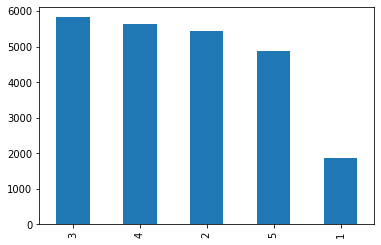

In [7]:
stats.plot.bar()

In [8]:
data['Country'].nunique()

188

In [9]:
dc=data.groupby('Country')['Confirmed'].nunique()
dc

Country
Afghanistan           74
Albania               80
Algeria               84
Andorra               52
Angola                30
                      ..
West Bank and Gaza    60
Western Sahara         4
Yemen                 26
Zambia                47
Zimbabwe              30
Name: Confirmed, Length: 188, dtype: int64

In [10]:
data.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
Month        0
Year         0
Day          0
dtype: int64

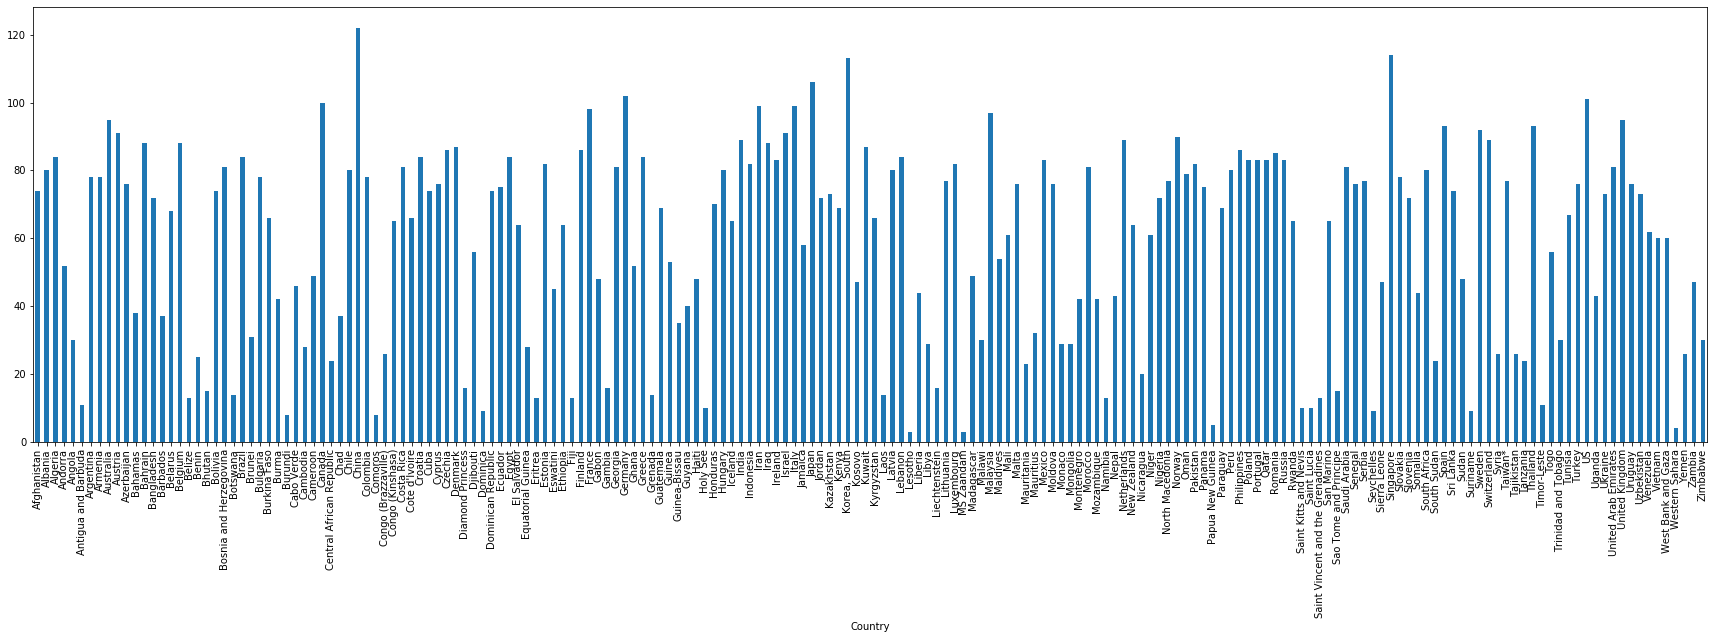

In [11]:
fig= plt.figure(figsize=(30,8))
dc.plot.bar()

In [12]:
data.describe()

,Confirmed,Recovered,Deaths,Month,Year,Day
count,2.368800e+04,23688.000000,23688.000000,23688.000000,23688.0,23688.000000
mean,7.969368e+03,2581.801714,526.935030,3.261905,2020.0,15.968254
std,5.842109e+04,15143.101257,3992.815956,1.242007,0.0,8.730660
min,0.000000e+00,0.000000,0.000000,1.000000,2020.0,1.000000
25%,0.000000e+00,0.000000,0.000000,2.000000,2020.0,8.000000
50%,1.800000e+01,1.000000,0.000000,3.000000,2020.0,16.000000
75%,7.300000e+02,123.000000,13.000000,4.000000,2020.0,24.000000
max,1.680913e+06,384902.000000,98913.000000,5.000000,2020.0,31.000000


In [13]:
data['Confirmed'].sum()

188778378

In [14]:
India=data[data['Country']=='India']

In [15]:
India

,Date,Country,Confirmed,Recovered,Deaths,Month,Year,Day
79,2020-01-22,India,0,0,0,1,2020,22
267,2020-01-23,India,0,0,0,1,2020,23
455,2020-01-24,India,0,0,0,1,2020,24
643,2020-01-25,India,0,0,0,1,2020,25
831,2020-01-26,India,0,0,0,1,2020,26
...,...,...,...,...,...,...,...,...
22827,2020-05-22,India,124794,51824,3726,5,2020,22
23015,2020-05-23,India,131423,54385,3868,5,2020,23
23203,2020-05-24,India,138536,57692,4024,5,2020,24
23391,2020-05-25,India,144950,60706,4172,5,2020,25


In [16]:
India.drop(['Country'],axis=1,inplace=True)
India.drop(['Date'],axis=1,inplace=True)

In [17]:
month_confirmed=data.groupby('Month')['Confirmed'].nunique()
month_Recovered=data.groupby('Month')['Recovered'].nunique()
month_death=data.groupby('Month')['Deaths'].nunique()

In [18]:
month_confirmed

Month
1      26
2     145
3    1127
4    2713
5    2942
Name: Confirmed, dtype: int64

In [19]:
month_Recovered

Month
1      14
2      66
3     339
4    1518
5    2295
Name: Recovered, dtype: int64

In [20]:
month_death

Month
1      11
2      48
3     287
4     905
5    1152
Name: Deaths, dtype: int64

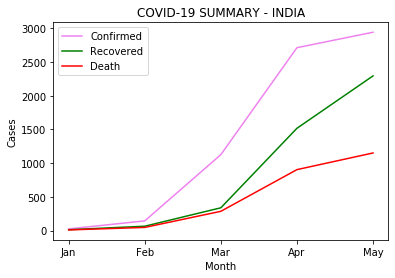

In [21]:
x=['Jan','Feb','Mar','Apr','May']
y1=month_confirmed
y2=month_Recovered
y3=month_death

plt.plot(x,y1,label='Confirmed',color='violet')
plt.plot(x,y2,label='Recovered',color='green')
plt.plot(x,y3,label='Death',color='red')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.title('COVID-19 SUMMARY - INDIA')
plt.legend()

In [22]:
total_cases=India['Confirmed'].sum()
total_cases

2677040

In [23]:
India.skew()

Confirmed    1.950712
Recovered    2.381604
Deaths       1.789184
Month       -0.108898
Year         0.000000
Day         -0.069761
dtype: float64

In [24]:
India.head()

,Confirmed,Recovered,Deaths,Month,Year,Day
79,0,0,0,1,2020,22
267,0,0,0,1,2020,23
455,0,0,0,1,2020,24
643,0,0,0,1,2020,25
831,0,0,0,1,2020,26


In [25]:
x=India.iloc[:,1:]
x.head()

,Recovered,Deaths,Month,Year,Day
79,0,0,1,2020,22
267,0,0,1,2020,23
455,0,0,1,2020,24
643,0,0,1,2020,25
831,0,0,1,2020,26


In [26]:
y=India.iloc[:,0:1]
y.head()

,Confirmed
79,0
267,0
455,0
643,0
831,0


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
max_r=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    print("r2 Score Corresponding to",r_state,"is",r2scr)
    if r2scr>max_r:
        max_r=r2scr
        max_r_state=r_state

print()
print('The maximum r2 Score is',max_r,'corresponding to r value',max_r_state)

r2 Score Corresponding to 42 is 0.9988551101675337
r2 Score Corresponding to 43 is 0.9995266850809713
r2 Score Corresponding to 44 is 0.999448295986369
r2 Score Corresponding to 45 is 0.9993541010893103
r2 Score Corresponding to 46 is 0.9993045858696041
r2 Score Corresponding to 47 is 0.9994331978215667
r2 Score Corresponding to 48 is 0.9988497279627959
r2 Score Corresponding to 49 is 0.9997272729915708
r2 Score Corresponding to 50 is 0.9995359546425563
r2 Score Corresponding to 51 is 0.999250469866961
r2 Score Corresponding to 52 is 0.9996872594436578
r2 Score Corresponding to 53 is 0.9996145257172863
r2 Score Corresponding to 54 is 0.9989722787991682
r2 Score Corresponding to 55 is 0.9995852742723526
r2 Score Corresponding to 56 is 0.9991758356015188
r2 Score Corresponding to 57 is 0.9992898136903392
r2 Score Corresponding to 58 is 0.999505347431134
r2 Score Corresponding to 59 is 0.9994699778093337
r2 Score Corresponding to 60 is 0.9994497027183087
r2 Score Corresponding to 61 is 0.

In [30]:
from sklearn.externals import joblib
joblib.dump(lr,'covid_india.pkl')

['covid_india.pkl']

In [31]:
model=joblib.load('covid_india.pkl')

In [32]:
model.predict(x_test)

array([[-4.77376246e+02],
       [ 6.73030692e+04],
       [ 5.02726948e+04],
       [ 8.26003273e+04],
       [ 9.01174579e+02],
       [ 1.87743980e+02],
       [ 3.35034295e+02],
       [ 1.27017659e+04],
       [ 7.72762435e+01],
       [ 1.61266520e+04],
       [ 4.08679453e+02],
       [ 4.04536647e+01],
       [-1.09150457e+02],
       [ 1.30505966e+05],
       [ 6.27127754e+02],
       [ 3.93432326e+04],
       [ 4.82324611e+02],
       [ 1.50921401e+02],
       [ 1.02748235e+05],
       [ 7.44536910e+02],
       [ 3.02507239e+04],
       [ 2.99535377e+03],
       [ 2.98211717e+02],
       [ 2.87148460e+02],
       [ 2.82037822e+04],
       [ 3.97616196e+02]])